In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb

In [3]:
features = pd.read_csv("C://Users/Elliot/Downloads/ONLINE COURSES/ELEVOO INTERNSHIP/Data/features.csv")
stores = pd.read_csv("C://Users/Elliot/Downloads/ONLINE COURSES/ELEVOO INTERNSHIP/Data/stores.csv")
train = pd.read_csv("C://Users/Elliot/Downloads/ONLINE COURSES/ELEVOO INTERNSHIP/Data/train.csv")

In [4]:
features.head()

,Store,Date,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday
0,1,2010-02-05,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False
1,1,2010-02-12,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True
2,1,2010-02-19,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False
3,1,2010-02-26,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False
4,1,2010-03-05,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False


In [5]:
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Store         8190 non-null   int64  
 1   Date          8190 non-null   object 
 2   Temperature   8190 non-null   float64
 3   Fuel_Price    8190 non-null   float64
 4   MarkDown1     4032 non-null   float64
 5   MarkDown2     2921 non-null   float64
 6   MarkDown3     3613 non-null   float64
 7   MarkDown4     3464 non-null   float64
 8   MarkDown5     4050 non-null   float64
 9   CPI           7605 non-null   float64
 10  Unemployment  7605 non-null   float64
 11  IsHoliday     8190 non-null   bool   
dtypes: bool(1), float64(9), int64(1), object(1)
memory usage: 712.0+ KB


In [6]:
# Changing the date variable type from object to date
features['Date'] =pd.to_datetime(features['Date'])
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8190 entries, 0 to 8189
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Store         8190 non-null   int64         
 1   Date          8190 non-null   datetime64[ns]
 2   Temperature   8190 non-null   float64       
 3   Fuel_Price    8190 non-null   float64       
 4   MarkDown1     4032 non-null   float64       
 5   MarkDown2     2921 non-null   float64       
 6   MarkDown3     3613 non-null   float64       
 7   MarkDown4     3464 non-null   float64       
 8   MarkDown5     4050 non-null   float64       
 9   CPI           7605 non-null   float64       
 10  Unemployment  7605 non-null   float64       
 11  IsHoliday     8190 non-null   bool          
dtypes: bool(1), datetime64[ns](1), float64(9), int64(1)
memory usage: 712.0 KB


In [7]:
stores.head()

,Store,Type,Size
0,1,A,151315
1,2,A,202307
2,3,B,37392
3,4,A,205863
4,5,B,34875


In [8]:
train['Date'] =pd.to_datetime(train['Date'])

In [9]:
train.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday
0,1,1,2010-02-05,24924.50,False
1,1,1,2010-02-12,46039.49,True
2,1,1,2010-02-19,41595.55,False
3,1,1,2010-02-26,19403.54,False
4,1,1,2010-03-05,21827.90,False


In [10]:
# Merging the datasets
mix = pd.merge(train,features,on=['Store','Date'],how='left')
data =pd.merge(mix ,stores,on='Store',how='left')

In [11]:
data.head()

,Store,Dept,Date,Weekly_Sales,IsHoliday_x,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,IsHoliday_y,Type,Size
0,1,1,2010-02-05,24924.50,False,42.31,2.572,NaN,NaN,NaN,NaN,NaN,211.096358,8.106,False,A,151315
1,1,1,2010-02-12,46039.49,True,38.51,2.548,NaN,NaN,NaN,NaN,NaN,211.242170,8.106,True,A,151315
2,1,1,2010-02-19,41595.55,False,39.93,2.514,NaN,NaN,NaN,NaN,NaN,211.289143,8.106,False,A,151315
3,1,1,2010-02-26,19403.54,False,46.63,2.561,NaN,NaN,NaN,NaN,NaN,211.319643,8.106,False,A,151315
4,1,1,2010-03-05,21827.90,False,46.50,2.625,NaN,NaN,NaN,NaN,NaN,211.350143,8.106,False,A,151315


In [12]:
data.describe()

,Store,Dept,Date,Weekly_Sales,Temperature,Fuel_Price,MarkDown1,MarkDown2,MarkDown3,MarkDown4,MarkDown5,CPI,Unemployment,Size
count,421570.000000,421570.000000,421570,421570.000000,421570.000000,421570.000000,150681.000000,111248.000000,137091.000000,134967.000000,151432.000000,421570.000000,421570.000000,421570.000000
mean,22.200546,44.260317,2011-06-18 08:30:31.963375104,15981.258123,60.090059,3.361027,7246.420196,3334.628621,1439.421384,3383.168256,4628.975079,171.201947,7.960289,136727.915739
min,1.000000,1.000000,2010-02-05 00:00:00,-4988.940000,-2.060000,2.472000,0.270000,-265.760000,-29.100000,0.220000,135.160000,126.064000,3.879000,34875.000000
25%,11.000000,18.000000,2010-10-08 00:00:00,2079.650000,46.680000,2.933000,2240.270000,41.600000,5.080000,504.220000,1878.440000,132.022667,6.891000,93638.000000
50%,22.000000,37.000000,2011-06-17 00:00:00,7612.030000,62.090000,3.452000,5347.450000,192.000000,24.600000,1481.310000,3359.450000,182.318780,7.866000,140167.000000
75%,33.000000,74.000000,2012-02-24 00:00:00,20205.852500,74.280000,3.738000,9210.900000,1926.940000,103.990000,3595.040000,5563.800000,212.416993,8.572000,202505.000000
max,45.000000,99.000000,2012-10-26 00:00:00,693099.360000,100.140000,4.468000,88646.760000,104519.540000,141630.610000,67474.850000,108519.280000,227.232807,14.313000,219622.000000
std,12.785297,30.492054,NaN,22711.183519,18.447931,0.458515,8291.221345,9475.357325,9623.078290,6292.384031,5962.887455,39.159276,1.863296,60980.583328


In [13]:
# Checking missing values
print(data.isnull().sum())

Store                0
Dept                 0
Date                 0
Weekly_Sales         0
IsHoliday_x          0
Temperature          0
Fuel_Price           0
MarkDown1       270889
MarkDown2       310322
MarkDown3       284479
MarkDown4       286603
MarkDown5       270138
CPI                  0
Unemployment         0
IsHoliday_y          0
Type                 0
Size                 0
dtype: int64


In [14]:
markdown_cols = ['MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5']
data[markdown_cols] = data[markdown_cols].fillna(0)
print(data.isnull().sum())

Store           0
Dept            0
Date            0
Weekly_Sales    0
IsHoliday_x     0
Temperature     0
Fuel_Price      0
MarkDown1       0
MarkDown2       0
MarkDown3       0
MarkDown4       0
MarkDown5       0
CPI             0
Unemployment    0
IsHoliday_y     0
Type            0
Size            0
dtype: int64


In [15]:
# creating time-based features
data['Year'] = data['Date'].dt.year
data['Month'] = data['Date'].dt.month
data['Week'] = data['Date'].dt.isocalendar().week.astype(int)
data['DayofWeek'] = data['Date'].dt.dayofweek

In [16]:
d = data[['Date', 'Year', 'Month', 'Week','DayofWeek']]
d.head()

,Date,Year,Month,Week,DayofWeek
0,2010-02-05,2010,2,5,4
1,2010-02-12,2010,2,6,4
2,2010-02-19,2010,2,7,4
3,2010-02-26,2010,2,8,4
4,2010-03-05,2010,3,9,4


In [17]:
data['lag1']  = data['Weekly_Sales'].shift(1)
data['lag2']  = data['Weekly_Sales'].shift(2)
data['lag3'] = data['Weekly_Sales'].shift(3) 

#droping all NA's in lags
data[['lag1','lag2', 'lag3']] = data[['lag1','lag2', 'lag3']].fillna(0)

In [18]:
# Changing the integer datatype from Boolean to integer
data['IsHoliday'] = data['IsHoliday_x'].astype(int)

In [19]:
#data = pd.get_dummies(data, columns=['Type'], drop_first=True)

In [20]:
data = data.sort_values(by=['Store', 'Dept', 'Date'])

In [21]:
train = data[data['Year'] < 2012]
test = data[data['Year'] == 2012]

In [22]:
# Splitting this dataset
x = ['Temperature','Fuel_Price','MarkDown1','MarkDown2','MarkDown3','MarkDown4','MarkDown5','CPI',
    'Unemployment','Size','Year','Month', 'Week','DayofWeek','lag1','lag2','lag3',
    'IsHoliday']

y = ['Weekly_Sales']

x_train = train[x]
y_train = train[y]

x_test = test[x]
y_test = test[y]

In [23]:
model =LinearRegression()
model.fit(x_train , y_train)

LinearRegression()

In [24]:
y_pred = model.predict(x_test)

In [25]:
# Evaluation Metrics
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score(%): {r2*100}")

RMSE: 4305.02979963675
MAE: 2091.0242921567374
R2 Score(%): 96.2123995745458


In [26]:
# Fitting the xgb model
model3 = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=500,learning_rate=0.05,
    max_depth=6,subsample=0.8, colsample_bytree=0.8,random_state=42)

In [27]:
model3.fit(x_train, y_train,eval_set=[(x_train, y_train), (x_test, y_test)],verbose=20)

[0]	validation_0-rmse:21919.08741	validation_1-rmse:21055.71144
[20]	validation_0-rmse:10000.98045	validation_1-rmse:8480.92233
[40]	validation_0-rmse:6787.34276	validation_1-rmse:4751.66695
[60]	validation_0-rmse:6039.11975	validation_1-rmse:3940.74164
[80]	validation_0-rmse:5792.36262	validation_1-rmse:3756.28523
[100]	validation_0-rmse:5621.15110	validation_1-rmse:3700.70676
[120]	validation_0-rmse:5517.86784	validation_1-rmse:3677.66208
[140]	validation_0-rmse:5421.40917	validation_1-rmse:3647.32364
[160]	validation_0-rmse:5322.40911	validation_1-rmse:3638.38441
[180]	validation_0-rmse:5241.47680	validation_1-rmse:3632.91693
[200]	validation_0-rmse:5176.45513	validation_1-rmse:3645.16949
[220]	validation_0-rmse:5115.53093	validation_1-rmse:3635.13127
[240]	validation_0-rmse:5050.13657	validation_1-rmse:3631.41455
[260]	validation_0-rmse:4980.55310	validation_1-rmse:3629.25328
[280]	validation_0-rmse:4920.39679	validation_1-rmse:3625.42322
[300]	validation_0-rmse:4864.57532	validati

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=0.8, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.05, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=6,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=500,
             n_jobs=None, num_parallel_tree=None, ...)

In [28]:
# Evaluation Metric
y_pred3 = model3.predict(x_test)
mse = mean_squared_error(y_test, y_pred3)
rmse = np.sqrt(mse)
mae = mean_absolute_error(y_test, y_pred3)
R2 = r2_score(y_test, y_pred3)
print(f"RMSE: {rmse}")
print(f"MAE: {mae}")
print(f"R2 Score(%): {R2*100}")

RMSE: 3599.436900405395
MAE: 1639.576171875
R2 Score(%): 97.35222458839417


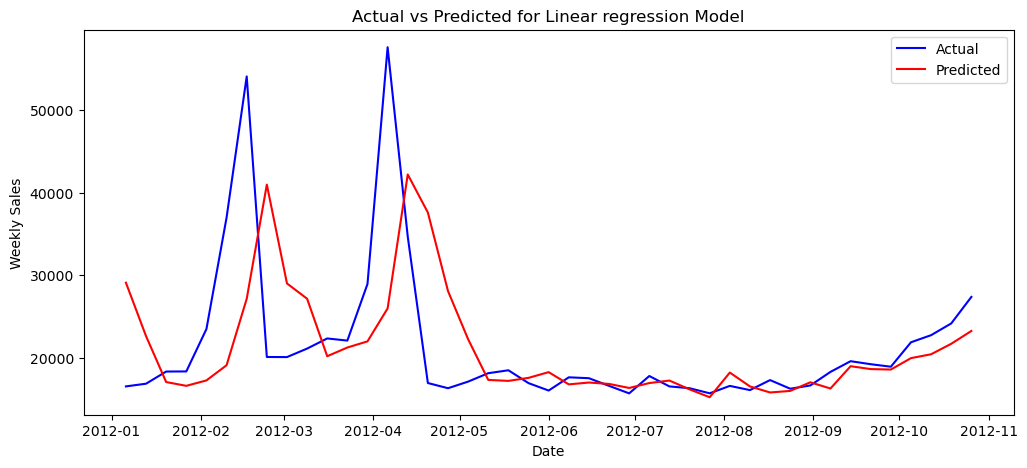

In [31]:
# Actual verse Predicted
store = 1
dept = 1
mask = (test['Store']==store) & (test['Dept']==dept)
plt.figure(figsize=(12,5))
plt.plot(test.loc[mask,'Date'], y_test[mask], label='Actual', color='blue')
plt.plot(test.loc[mask,'Date'], y_pred[mask], label='Predicted', color='red')
plt.title('Actual vs Predicted for Linear regression Model')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()

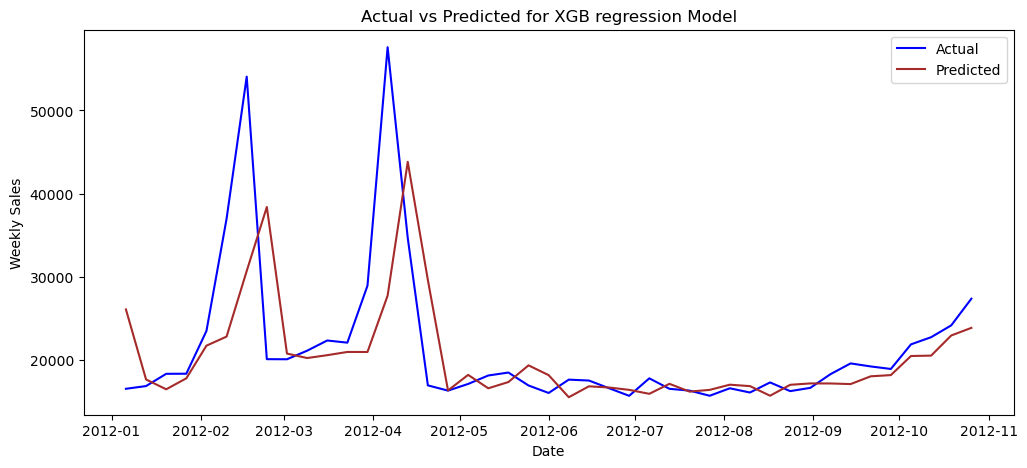

In [32]:
# Actual verse Predicted
mask = (test['Store']==store) & (test['Dept']==dept)
plt.figure(figsize=(12,5))
plt.plot(test.loc[mask,'Date'], y_test[mask], label='Actual', color='blue')
plt.plot(test.loc[mask,'Date'], y_pred3[mask], label='Predicted', color='brown')
plt.title('Actual vs Predicted for XGB regression Model')
plt.xlabel('Date')
plt.ylabel('Weekly Sales')
plt.legend()
plt.show()